# 外泌体数据分析

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [241]:
data = pd.read_csv("./data.csv", encoding='unicode_escape')
data = data[['code', 'disease', 'subtype', 'stage',
       'his-miR-141-3P', 'his-miR-107', 'his-miR-574-3P', 'his-miR-181a-5P',
       'his-miR-375', 'his-miR-629-5P', 'his-miR-100-5P', 'his-miR-154-3P',
       'his-miR-378a-3P', 'his-miR-30a-3P', 'his-miR-200b-5P',
       'his-miR-155-5P', 'his-miR-21-5P']]

data.columns

Index(['code', 'disease', 'subtype', 'stage', 'his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P'],
      dtype='object')

## 数据预览

In [242]:
# 基因表达量
data.describe().T

,count,mean,std,min,25%,50%,75%,max
his-miR-141-3P,59.0,1.064286,0.843474,0.0690,0.46250,0.7870,1.48420,3.8107
his-miR-107,59.0,1.822700,2.019306,0.0082,0.41180,1.1172,2.33230,9.3537
his-miR-574-3P,59.0,1.502197,2.063674,0.1259,0.62590,0.9301,1.70980,13.3427
his-miR-181a-5P,59.0,1.586788,2.387624,0.0072,0.62255,0.9411,1.65045,12.5377
his-miR-375,59.0,1.732300,2.878609,0.1246,0.48595,0.7601,1.40185,15.4019
his-miR-629-5P,59.0,2.657388,5.555519,0.0592,0.73755,1.1036,2.11035,37.2974
his-miR-100-5P,59.0,1.003653,0.765648,0.0335,0.62800,0.8457,1.20575,4.4294
his-miR-154-3P,59.0,2.376988,5.095857,0.0758,0.65910,1.1742,1.97345,37.2576
his-miR-378a-3P,59.0,1.379164,1.568019,0.0164,0.64905,1.0763,1.55280,11.1408
his-miR-30a-3P,59.0,1.176619,1.121007,0.0384,0.64490,0.8676,1.27065,5.8349


In [243]:
data.columns

Index(['code', 'disease', 'subtype', 'stage', 'his-miR-141-3P', 'his-miR-107',
       'his-miR-574-3P', 'his-miR-181a-5P', 'his-miR-375', 'his-miR-629-5P',
       'his-miR-100-5P', 'his-miR-154-3P', 'his-miR-378a-3P', 'his-miR-30a-3P',
       'his-miR-200b-5P', 'his-miR-155-5P', 'his-miR-21-5P'],
      dtype='object')

In [244]:
all_sample_exp.head()

,sample,disease,subtype,stage,miRNA,exp,log_exp
0,P001,lung,adenocarcinoma,invasive,his-miR-141-3P,0.7870,0.580538
1,P001,lung,adenocarcinoma,invasive,his-miR-107,0.1305,0.122660
2,P001,lung,adenocarcinoma,invasive,his-miR-574-3P,0.5664,0.448780
3,P001,lung,adenocarcinoma,invasive,his-miR-181a-5P,0.1593,0.147816
4,P001,lung,adenocarcinoma,invasive,his-miR-375,1.2212,0.798048


In [246]:

# 制作miran表达矩阵

all_sample_exp = []
for sample, row in data.groupby('code'):
    gene_names = row.columns.tolist()[4: ]
    disease = row.disease.tolist()[0]
    subtype = row.subtype.tolist()[0]
    stage = row.stage.tolist()[0]
    # print("cols: ", disease, subtype, stage)
    for gene_name in gene_names:
        exp = row[gene_name].tolist()[0]
        all_sample_exp.append({
            "sample": sample,
            "disease": disease,
            "subtype": subtype,
            "stage": stage,
            "miRNA": gene_name,
            "exp": exp
        })

all_sample_exp = pd.DataFrame(all_sample_exp)
all_sample_exp['log_exp'] = all_sample_exp['exp'].apply(lambda x: np.log(1 + x))
all_sample_exp.describe()

,exp,log_exp
count,767.000000,767.000000
mean,1.915125,0.773023
std,6.230991,0.572832
min,0.007200,0.007174
25%,0.539550,0.431490
50%,0.923100,0.653938
75%,1.595000,0.953587
max,143.895300,4.976011


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

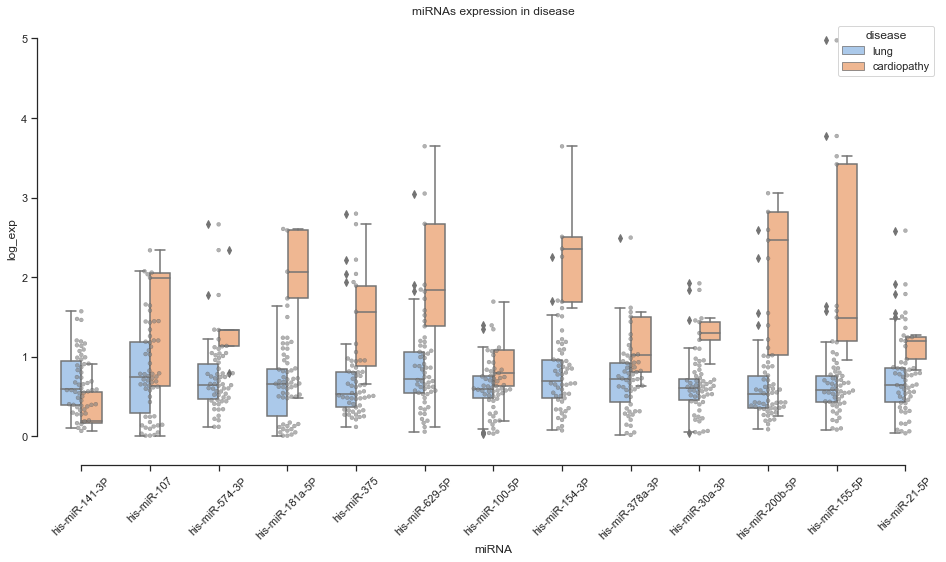

In [247]:
# 绘制mirna表达散点图
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(16 ,8))
sns.boxplot(x=all_sample_exp['miRNA'], y=all_sample_exp['log_exp'], hue=all_sample_exp['disease'],
            palette="pastel", 
            width=.6)
sns.swarmplot(data=all_sample_exp, x='miRNA', y='log_exp',  color='grey', 
              size=4, linewidth=0.2, edgecolor='k', alpha=0.6)

# sns.violinplot(data=all_sample_exp, x='miRNA', y='log_exp', hue=all_sample_exp['disease'])
sns.despine(offset=10, trim=True)
plt.title('miRNAs expression in disease')
plt.xticks(rotation='45')


## 肺癌

In [36]:
lung = data[data['disease']=='lung']

In [86]:
lung_des = lung.describe().reset_index()

# 肺癌-平均值
all_lung_mean_expression = lung_des[lung_des['index'] == 'mean'].drop(columns=['index']).T.reset_index()

all_lung_mean_expression.rename(columns={"index": "miRNA", 1: "exp"}, inplace=True)
all_lung_mean_expression


,miRNA,exp
0,his-miR-141-3P,1.112974
1,his-miR-107,1.558048
2,his-miR-574-3P,1.302257
3,his-miR-181a-5P,1.048031
4,his-miR-375,1.426561
5,his-miR-629-5P,1.807985
6,his-miR-100-5P,0.935476
7,his-miR-154-3P,1.365457
8,his-miR-378a-3P,1.300554
9,his-miR-30a-3P,1.043011


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

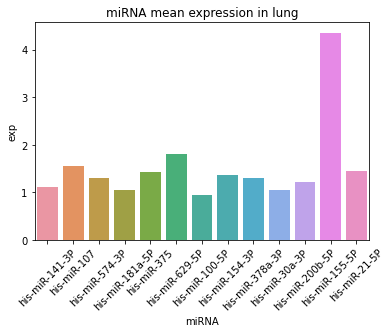

In [94]:
# 肺癌各基因平均表达量
sns.barplot(all_lung_mean_expression['miRNA'], y=all_lung_mean_expression['exp'])
plt.title('miRNA mean expression in lung')
plt.xticks(rotation='45')

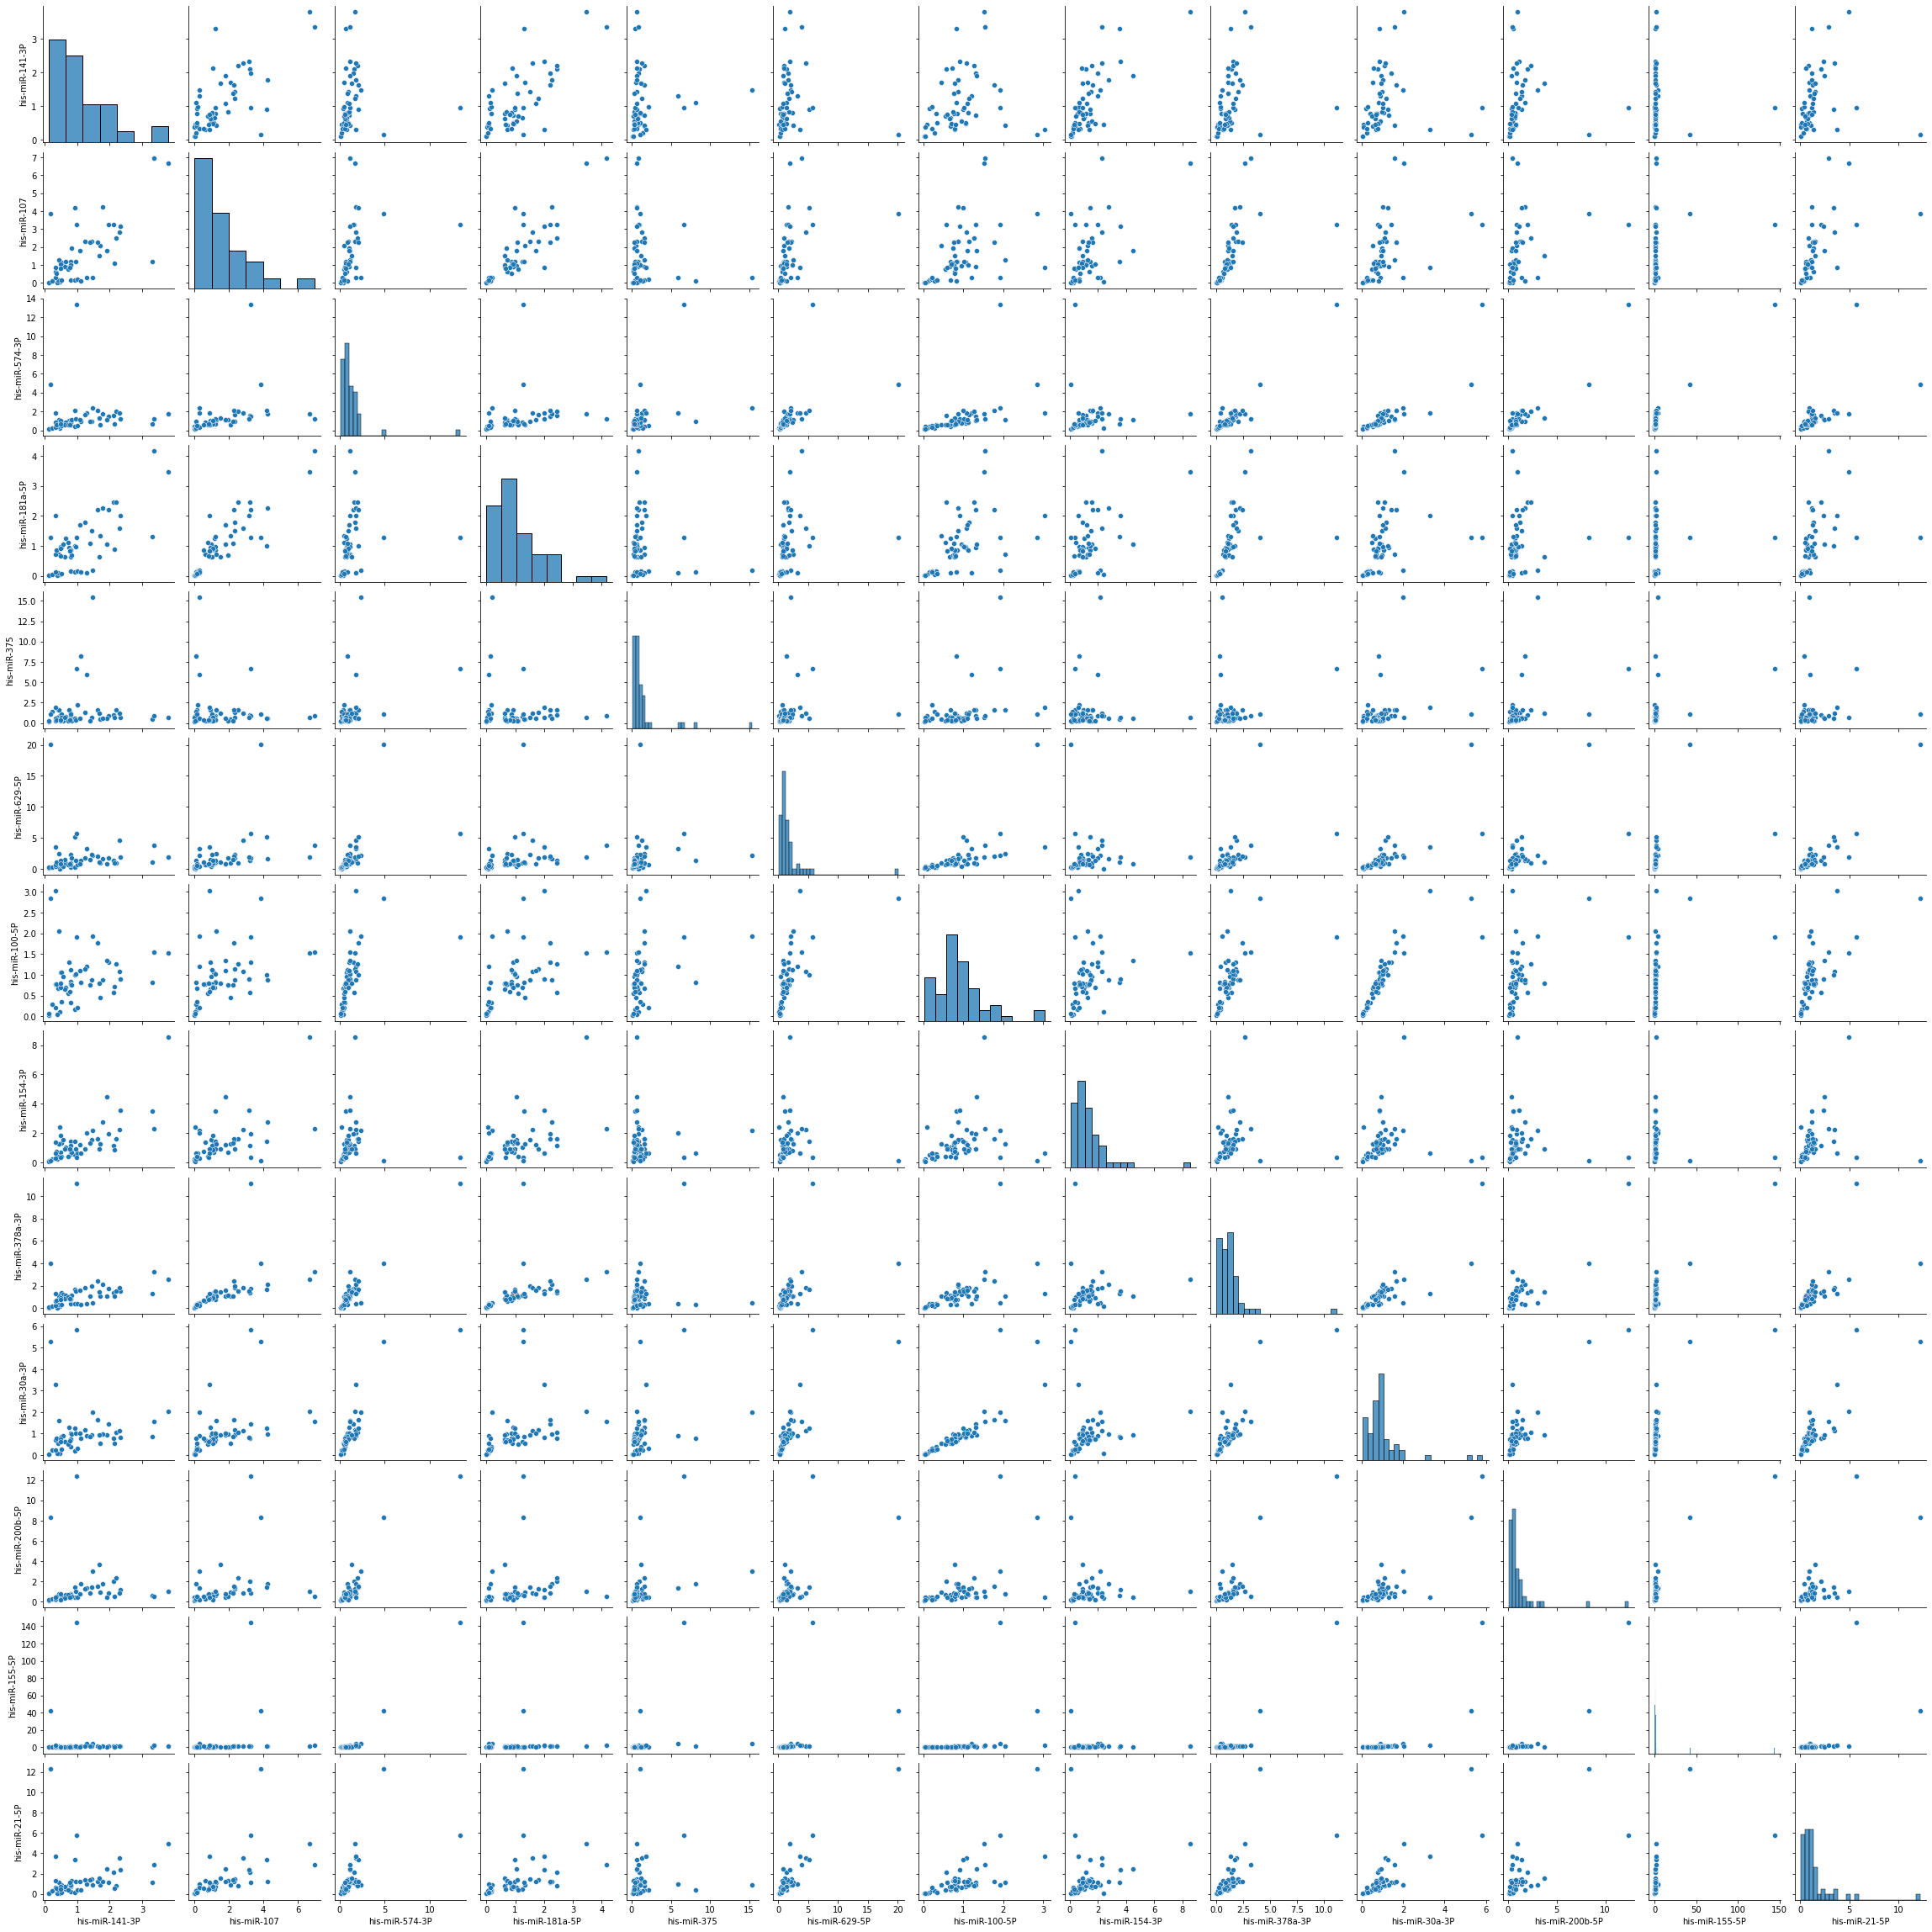

In [33]:
sns.pairplot(lung)

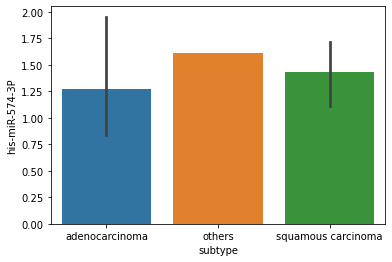

In [34]:
sns.barplot(x=lung['subtype'], y=lung['his-miR-574-3P'])